## Negative feedback oscillation modeling through a system of ODEs

The demonstration in recent years of negative feedback control processes operating at the molecular level in cells leads naturally to a study of their dynamic properties. It is known that those mechanism are really likely to produce oscillations, and that is why it is suggested that spontaneous oscillatory behavior in an organism's control processes constitutes the dynamic basis of rhythmic behavior patterns. 
This hypothesis has been well studied in previous years. Indeed, Goodwin et al,(1965) shown this approach during enzymatic control processes. 
1. In here, we are trying to demonstrate this hypothesis of dynamic oscillations through a mathematical representation of a negative feedback loop gene expresison, taking into consideration Goodwin's model. 
2. For more information about read the paper: https://www.sciencedirect.com/science/article/pii/0065257165900671

In a nutshel, a system of ODEs is modeling the behavior of the expresison of three genes when gene 1 can activate gene 2, and then, gene 2 can activate gene 3, however, gene 3 will act as repressor of gene 1.
More information about negative feedback can be found here: https://swainlab.bio.ed.ac.uk/psb/lectures/negative.pdf

The ODEs system is as follows:

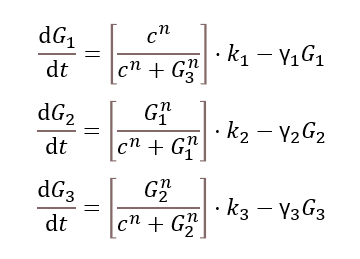

Where:
* 𝑚 = mRNA
* G1, G2, G3 = genes
* 𝑘1, 𝑘2, 𝑘3 =  production rate of each specific gene
* 𝛾1, 𝛾2, 𝛾3 = degradation rate of each specific gene


## Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#matplotlib.use
from scipy.integrate import odeint

### Solving the system of ODEs

In [ ]:
y0 = [0,0,0] # the first vector is the gene1, second vector gene2, third vector is gene 3. Initial conditions
t = np.linspace(0,200, num=100)  # time steps 

#Parameters
""" These are the set of parameters dominating the output of the ODE system """
k_1 =  0.5  # Productiom rate of gene 1
gamma_1 = 0.1   # Degradation rate of gene 1
k_2 = 0.5   # Productiom rate of gene 2
gamma_2 = 0.1   # Degradation rate of gene 2
k_3 = 0.5   # Productiom rate of gene 3
gamma_3 = 0.1  # Degradation rate of gene 3
n = 9
c = 1

parameters = [k_1, gamma_1 ,k_2, gamma_2, k_3 , gamma_3, n, c]  # setting the parameters in a single array 

# Defining master function 
def simulation (variables, t, parameters):
    # Variables
    G1= variables[0]   # Initial conditions
    G2= variables[1]   # Initial conditions
    G3= variables[2]   # Initial conditions

    # Parameters
    k_1 = parameters[0]
    gamma_1  = parameters[1]
    k_2 = parameters[2]
    gamma_2 = parameters[3]
    k_3 = parameters[4]
    gamma_3=parameters[5]
    n= parameters[6]
    c= parameters[7]
    
    # ODEs
    dG1dt = (c**n/(c**n + G3**n))* k_1 - gamma_1*G1
    dG2dt = (G1**n/(c**n + G1**n))* k_2 - gamma_2*G2
    dG3dt = (G2**n/(c**n + G2**n))* k_3 - gamma_3*G3
    
    return ([dG1dt,dG2dt,dG3dt])

# Solving the ODEs
y = odeint(simulation, y0, t, args=(parameters,)) # Simulation, initial conditions, time steps, Extra arguments to pass

In [ ]:
print(y) # y contains three vectors: gene1, gene2, gene3

## Plotting 

In [ ]:
f, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey = False)
line1, = ax1.plot(t,y[:,0],color = "black", label = " G1 ")
line2, = ax2.plot(t,y[:,1],color = "blue",label = " G2")
line3, = ax3.plot(t,y[:,2],color = "green",label = " G3")

ax1.set_ylabel("Number")
ax1.set_xlabel("time")

#plt.title (" mRNA and protein abundance over time ")
ax1.legend(handles=[line1, line2, line3])
plt.show()

We observe the oscillations, mentioned by Goodwin, by modeling the activation cascade with negative feedback